### Example: layered porosity 

$$\beta=0$$
$$\phi(y)=\begin{cases}
1 & y > \tfrac{1}{2}L_y \\
0.1 & \text{otherwise}
\end{cases}$$
$$\kappa = 1$$

In [1]:
from lucifex.fdm import AB2, CN
from lucifex.sim import integrate
from lucifex.viz import plot_colormap
from lucifex.io import write

from py.porous_convection_anisotropic import porous_convection_anisotropic_rectangle

Ly = 1.0
k_lower = 0.1
h = 0.5 * Ly
porosity = lambda x: 1 + (k_lower - 1) * (x[1] < h)
simulation_layer = porous_convection_anisotropic_rectangle(
    Lx=2.0,
    Ly=Ly,
    Nx=64,
    Ny=64,
    cell='quadrilateral', 
    Ra=500.0, 
    porosity=porosity,
    kappa=1.0,
    c_eps=1e-4, 
    c_freq=(14, 14), 
    c_seed=(456, 987), 
    D_adv=AB2,
    D_diff=CN,
)

n_stop = 200
dt_init = 1e-6
n_init = 5
integrate(simulation_layer, n_stop=n_stop, dt_init=dt_init, n_init=n_init)

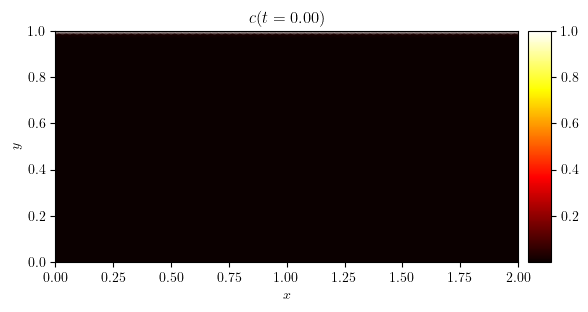

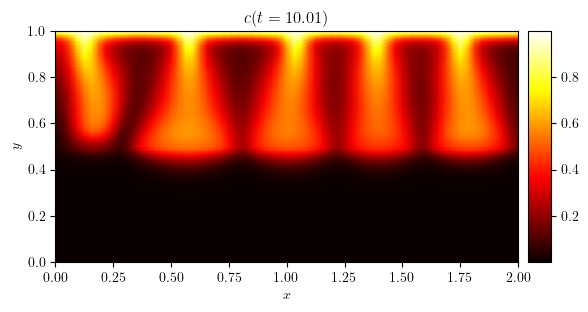

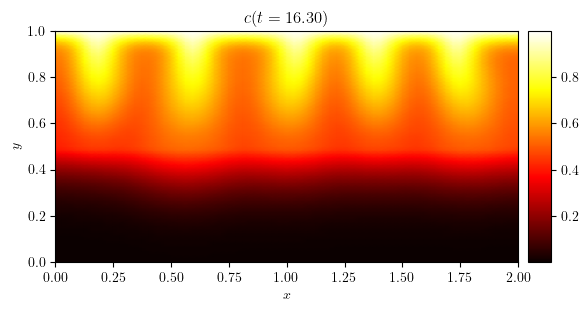

In [3]:
c = simulation_layer['c']

i_mid = int(0.5 * len(c.series))
time_indices = (0, i_mid,  -1)
for i in time_indices:
    fig, ax = plot_colormap(c.series[i], title=f'$c(t={c.time_series[i]:.2f})$')
    write(fig, f'A16c_porous_convection_layered_c(t={c.time_series[i]:.2f})', './figures', close=False, pickle=False)